# AML 3104 - Deep learning & Neural Networks
# AIMT - 2023S - Section 2
Project: Deep Fake Detection  
Professor Mohammad Saiful Islam  
Group Members  
Gouravdeep Singh - C0856439  
Tanmay Pathak - C0860056  
Vinicius Vandre Lopes - C0855070  

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import tensorflow as tf


# loading the images

real


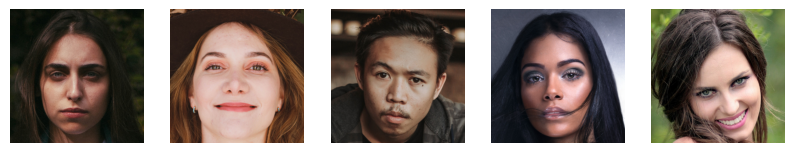

fake


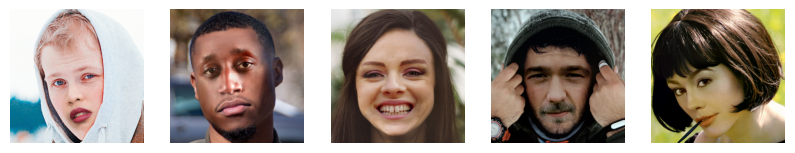

In [2]:
real = "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face/training_real"
fake = "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face/training_fake"

# Create a figure and a horizontal subplot with 1 row and 10 columns
fig, axes = plt.subplots(1, 5, figsize=(10, 2))

# Get the list of real and fake images
real_path = os.listdir(real)[:10]  # First 10 real images
fake_path = os.listdir(fake)[:10]  # First 10 fake images
print("real")
for i in range(5):
    # Load and display the real image
    real_img = mpimg.imread(os.path.join(real, real_path[i]))
    axes[i].imshow(real_img)
    axes[i].axis('off')  # Turn off axis labels for cleaner display

plt.show()
print("fake")
# Create another figure and a horizontal subplot with 1 row and 10 columns
fig, axes = plt.subplots(1,5, figsize=(10, 2))

for i in range(5):
    # Load and display the fake image
    fake_img = mpimg.imread(os.path.join(fake, fake_path[i]))
    axes[i].imshow(fake_img)
    axes[i].axis('off')  # Turn off axis labels for cleaner display

plt.show()

# Model Building

In [10]:
# Define image dimensions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width, img_height = 128, 128

# Data augmentation for training set
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Load training data
train_generator = train_data_gen.flow_from_directory(
    "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face"
    ,target_size=(img_width, img_height),
    batch_size=32,
    class_mode="binary",
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=15)

# Save the trained model
model.save("deep_fake.h5")

Found 2041 images belonging to 2 classes.


Epoch 1/15
64/64 [==============================] - 16s 244ms/step - loss: 0.7302 - accuracy: 0.5228
Epoch 2/15
64/64 [==============================] - 15s 232ms/step - loss: 0.6874 - accuracy: 0.5571
Epoch 3/15
64/64 [==============================] - 15s 239ms/step - loss: 0.6889 - accuracy: 0.5527
Epoch 4/15
64/64 [==============================] - 15s 235ms/step - loss: 0.6810 - accuracy: 0.5634
Epoch 5/15
64/64 [==============================] - 17s 258ms/step - loss: 0.6766 - accuracy: 0.5835
Epoch 6/15
64/64 [==============================] - 16s 253ms/step - loss: 0.6722 - accuracy: 0.5752
Epoch 7/15
64/64 [==============================] - 17s 269ms/step - loss: 0.6790 - accuracy: 0.5781
Epoch 8/15
64/64 [==============================] - 16s 254ms/step - loss: 0.6723 - accuracy: 0.5860
Epoch 9/15
64/64 [==============================] - 16s 243ms/step - loss: 0.6727 - accuracy: 0.5811
Epoch 10/15
64/64 [==============================] - 17s 268ms/step - loss: 0.6621 - accura

/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# testing the images

In [3]:
from tensorflow.keras.models import load_model
img_width, img_height = 128, 128

# Load the saved model
model = load_model("deep_fake.h5")

# Function to preprocess a single image for testing
def preprocess_single_image(image_path):
    image = mpimg.imread(image_path)
    image = tf.image.resize(image, (img_width, img_height))
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = np.expand_dims(image, axis=0)
    return image

# Function to predict whether an image is real or fake
def predict_image(image_path):
    image = preprocess_single_image(image_path)
    prediction = model.predict(image)[0][0]
    #print(prediction)
    if prediction >= 0.5:
        return "Real"
    else:
        return "Fake"

1/1 [==============================] - 0s 66ms/step


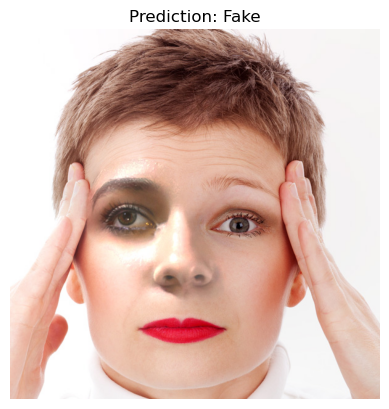

The image is Fake


In [4]:
test_image_path= "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face/training_fake/easy_9_1010.jpg"    # Replace with the path of the image you want to test

# Get the prediction result
prediction_result = predict_image(test_image_path)

# Load and display the test image
test_image = mpimg.imread(test_image_path)
plt.imshow(test_image)
plt.title(f"Prediction: {prediction_result}")
plt.axis('off')
plt.show()

print(f"The image is {prediction_result}")

1/1 [==============================] - 0s 17ms/step


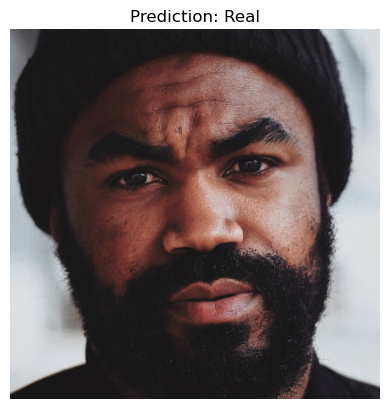

The image is Real


In [5]:
test_image_path= "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face/training_real/real_00703.jpg"    # Replace with the path of the image you want to test

# Get the prediction result
prediction_result = predict_image(test_image_path)

# Load and display the test image
test_image = mpimg.imread(test_image_path)
plt.imshow(test_image)
plt.title(f"Prediction: {prediction_result}")
plt.axis('off')
plt.show()

print(f"The image is {prediction_result}")

1/1 [==============================] - 0s 15ms/step


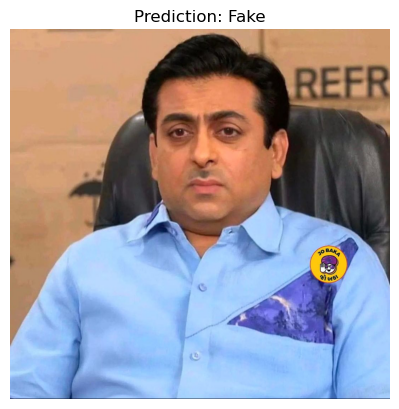

The image is Fake


In [6]:
test_image_path= "/Users/gouravdeepsingh/Downloads/WhatsApp Image 2023-08-01 at 10.37.14 AM.jpeg"    # Replace with the path of the image you want to test

# Get the prediction result
prediction_result = predict_image(test_image_path)

# Load and display the test image
test_image = mpimg.imread(test_image_path)
plt.imshow(test_image)
plt.title(f"Prediction: {prediction_result}")
plt.axis('off')
plt.show()

print(f"The image is {prediction_result}")

# evaluation

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load the test dataset
test_dir = "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face"  # Replace with the path to your test data folder
test_real_path = os.path.join(test_dir, "training_real")  # Test set for real images
test_fake_path = os.path.join(test_dir, "training_fake")  # Test set for fake images

test_real_images = [os.path.join(test_real_path, img) for img in os.listdir(test_real_path)]
test_fake_images = [os.path.join(test_fake_path, img) for img in os.listdir(test_fake_path)]

# Create ground truth labels for the test dataset
test_real_labels = np.ones(len(test_real_images))  # 1 represents "Real"
test_fake_labels = np.zeros(len(test_fake_images))  # 0 represents "Fake"
test_labels = np.concatenate([test_real_labels, test_fake_labels])

# Make predictions on the test dataset
test_predictions = []
for img_path in test_real_images + test_fake_images:
    prediction = predict_image(img_path)
    test_predictions.append(prediction)

# Convert string labels to integer labels for test_predictions
test_predictions = [1 if pred == "Real" else 0 for pred in test_predictions]



1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 12ms/step


In [16]:
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
target_names = ["Fake", "Real"]  # Reverse the order for consistent reporting
print(classification_report(test_labels, test_predictions, target_names=target_names))

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.63
              precision    recall  f1-score   support

        Fake       0.57      0.83      0.68       960
        Real       0.75      0.45      0.56      1081

    accuracy                           0.63      2041
   macro avg       0.66      0.64      0.62      2041
weighted avg       0.67      0.63      0.62      2041

Confusion Matrix:
[[800 160]
 [597 484]]


# Pre Trained Model

In [73]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D


img_width, img_height = 128, 128

# Data augmentation for training set
train_data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

# Load training data
train_generator = train_data_gen.flow_from_directory(
    "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face"
    ,target_size=(img_width, img_height),
    batch_size=32,
    class_mode="binary",
)
# Load the ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet',include_top=False, input_shape=(128,128,3))

for layer in base_model.layers[:46]:
    layer.trainable = False
    
model1 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



Found 2041 images belonging to 2 classes.


In [77]:
# Compile the model
model1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model1.fit(train_generator, epochs=10)

# Save the trained model
model1.save("pre.h5")

Epoch 1/10
64/64 [==============================] - 58s 876ms/step - loss: 1.5892 - accuracy: 0.5174
Epoch 2/10
64/64 [==============================] - 69s 1s/step - loss: 0.6938 - accuracy: 0.5140
Epoch 3/10
64/64 [==============================] - 72s 1s/step - loss: 0.6933 - accuracy: 0.5203
Epoch 4/10
64/64 [==============================] - 69s 1s/step - loss: 0.6920 - accuracy: 0.5292
Epoch 5/10
64/64 [==============================] - 69s 1s/step - loss: 0.6921 - accuracy: 0.5296
Epoch 6/10
64/64 [==============================] - 68s 1s/step - loss: 0.6920 - accuracy: 0.5296
Epoch 7/10
64/64 [==============================] - 69s 1s/step - loss: 0.6916 - accuracy: 0.5296
Epoch 8/10
64/64 [==============================] - 68s 1s/step - loss: 0.6917 - accuracy: 0.5296
Epoch 9/10
64/64 [==============================] - 68s 1s/step - loss: 0.6915 - accuracy: 0.5296
Epoch 10/10
64/64 [==============================] - 68s 1s/step - loss: 0.6918 - accuracy: 0.5296


/Users/gouravdeepsingh/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [78]:
# Load the saved model
from tensorflow.keras.models import load_model

model2 = load_model("pre.h5")

# Function to preprocess a single image for testing
def preprocess_single_image1(image_path):
    image = mpimg.imread(image_path)
    image = tf.image.resize(image, (img_width, img_height))
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = np.expand_dims(image, axis=0)
    return image

# Function to predict whether an image is real or fake
def predict_image2(image_path):
    image = preprocess_single_image1(image_path)
    prediction = model2.predict(image)[0][0]
    if prediction >= 0.5:
        return "Real"
    else:
        return "Fake"

1/1 [==============================] - 0s 296ms/step


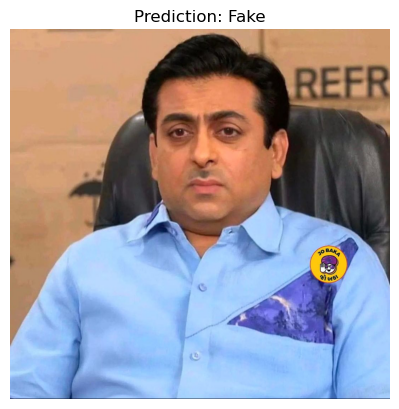

The image is Fake


In [79]:
test_image_path2= "/Users/gouravdeepsingh/Downloads/WhatsApp Image 2023-08-01 at 10.37.14 AM.jpeg"    # Replace with the path of the image you want to test

# Get the prediction result
result1 = predict_image2(test_image_path2)

# Load and display the test image
test_image = mpimg.imread(test_image_path2)
plt.imshow(test_image)
plt.title(f"Prediction: {result1}")
plt.axis('off')
plt.show()

print(f"The image is {result1}")

In [80]:

# Load the test dataset
test_dir = "/Users/gouravdeepsingh/Documents/AIMT-sem3/deep learning/Project/real_and_fake_face"  # Replace with the path to your test data folder
test_real_path1 = os.path.join(test_dir, "training_real")  # Test set for real images
test_fake_path1 = os.path.join(test_dir, "training_fake")  # Test set for fake images

test_real_images1 = [os.path.join(test_real_path1, img) for img in os.listdir(test_real_path1)]
test_fake_images1 = [os.path.join(test_fake_path1, img) for img in os.listdir(test_fake_path1)]

# Create ground truth labels for the test dataset
test_real_labels1 = np.ones(len(test_real_images1))  # 1 represents "Real"
test_fake_labels1 = np.zeros(len(test_fake_images1))  # 0 represents "Fake"
test_labels1 = np.concatenate([test_real_labels1, test_fake_labels1])

# Make predictions on the test dataset
test_predictions1 = []
for img_path in test_real_images1 + test_fake_images1:
    prediction = predict_image2(img_path)
    test_predictions1.append(prediction)

# Convert string labels to integer labels for test_predictions
test_predictions1 = [1 if pred == "Real" else 0 for pred in test_predictions1]



1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 26ms/step


In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(test_labels1, test_predictions1)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
target_names = ["Fake", "Real"]  # Reverse the order for consistent reporting
print(classification_report(test_labels1, test_predictions1,target_names=target_names))

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels1, test_predictions1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.47
              precision    recall  f1-score   support

        Fake       0.47      0.97      0.63       960
        Real       0.51      0.03      0.06      1081

    accuracy                           0.47      2041
   macro avg       0.49      0.50      0.34      2041
weighted avg       0.49      0.47      0.33      2041

Confusion Matrix:
[[ 929   31]
 [1049   32]]


In [83]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 3 (GlobalAveragePooling2D)                                      
                                                                 
 dense_26 (Dense)            (None, 512)               1049088   
                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 24044801 (91.72 MB)
Non-trainable params: 592512 (2.26 MB)
________